In [26]:
#Load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.calibration import CalibrationDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import os
import sys
import numpy as np

In [5]:
#Load dataframe for goal_distance simple model
df = pd.read_csv("../goal_distance_model/logistic_regression_goal_distance_model.csv")

In [11]:
print(df)
print(str(df.real_label))
print(str(df.predicted_label))

       Unnamed: 0  real_label  predicted_label  probability_no_goal  \
0               0       False            False             0.869878   
1               1       False            False             0.945934   
2               2       False            False             0.906411   
3               3       False            False             0.830629   
4               4       False            False             0.873662   
...           ...         ...              ...                  ...   
65464       65464       False            False             0.834502   
65465       65465       False            False             0.919338   
65466       65466       False            False             0.911382   
65467       65467       False            False             0.823545   
65468       65468       False            False             0.917486   

       probability_goal  goal_distance  
0              0.130122      19.104973  
1              0.054066      47.381431  
2              0.093589 

# Confusion matrix to look at false positive and false negative rates

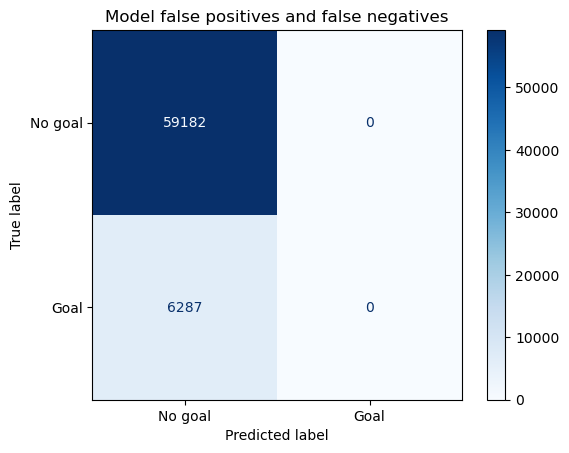

In [15]:
#Generate confusion matrix
conf_matrix = confusion_matrix(df['real_label'], df['predicted_label'])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No goal','Goal'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Model false positives and false negatives")
plt.show()

# ROC and AUC curve

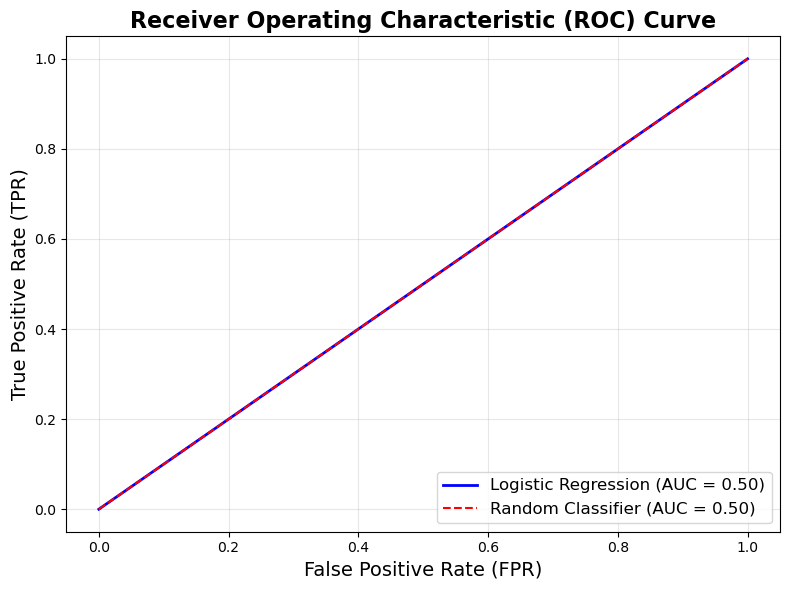

In [19]:
# Compute the false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(df['real_label'], df['predicted_label'])

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')

# Add the baseline for a random classifier
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier (AUC = 0.50)')

# Aesthetics and labels
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16, fontweight='bold')
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipykernel_106376/433440430.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  centile_goal_rate = df.groupby('centile').apply(


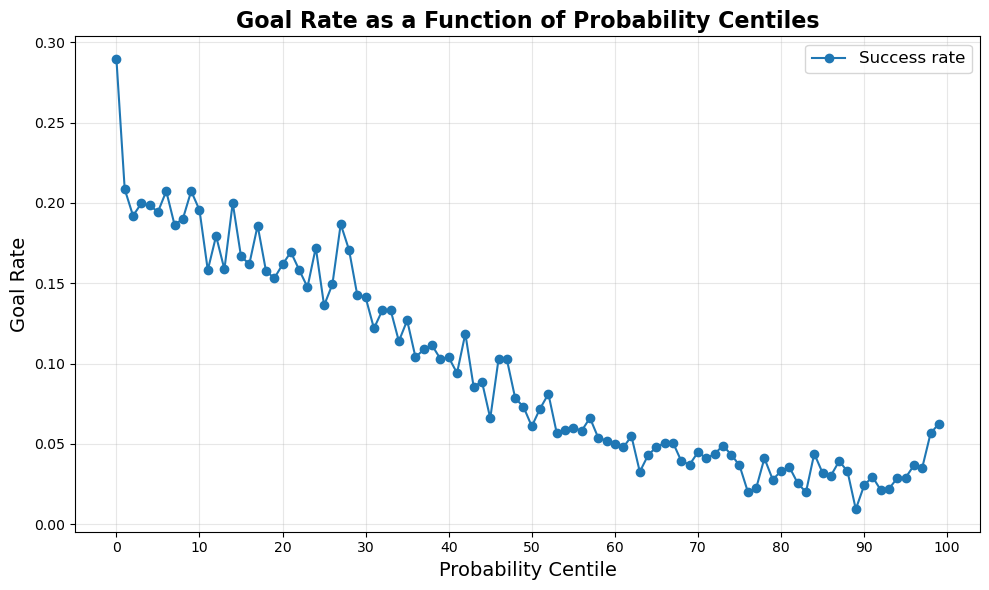

In [21]:
# Define centiles
df['centile'] = pd.qcut(df['probability_no_goal'], 100, labels=False)

# Calculate goal rate for each centile
centile_goal_rate = df.groupby('centile').apply(
    lambda group: group['real_label'].sum() / len(group)
).reset_index(name='success_rate')

# Plot goal rate as a function of centiles
plt.figure(figsize=(10, 6))
plt.plot(centile_goal_rate['centile'], centile_goal_rate['success_rate'], marker='o', label='Success rate')

# Add labels and formatting
plt.title('Goal Rate as a Function of Probability Centiles', fontsize=16, fontweight='bold')
plt.xlabel('Probability Centile', fontsize=14)
plt.ylabel('Goal Rate', fontsize=14)
plt.grid(alpha=0.3)
plt.xticks(ticks=np.arange(0, 101, 10), labels=np.arange(0, 101, 10))
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


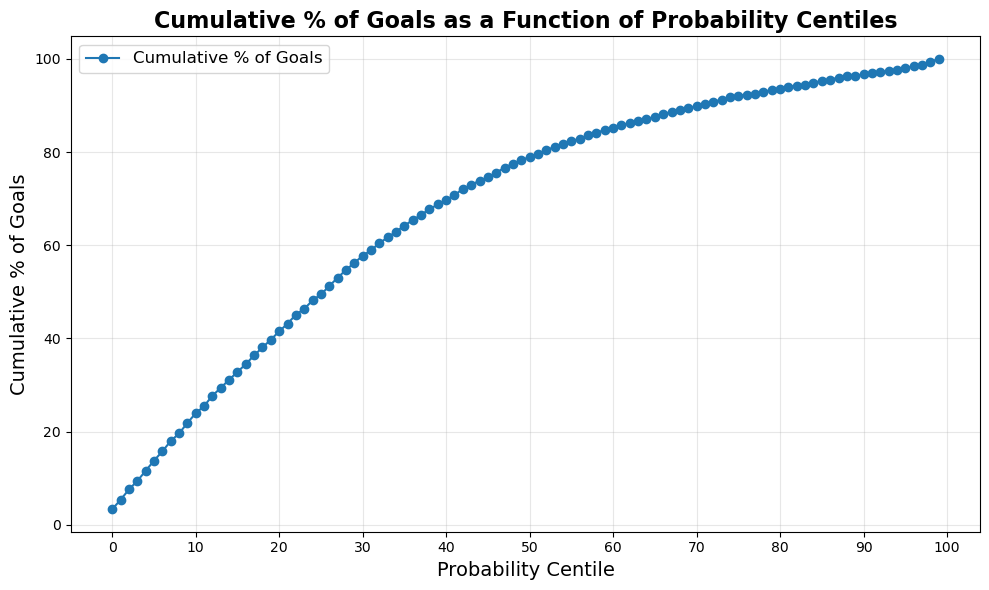

In [25]:
# Define centiles
df['centile'] = pd.qcut(df['probability_no_goal'], 100, labels=False)

# Calculate the number of goals per centile
centile_goals = df[df['real_label'] == True].groupby('centile')['real_label'].count().reset_index(name='goals')

# Calculate the cumulative percentage of goals
centile_goals['cumulative_goals'] = centile_goals['goals'].cumsum()
centile_goals['cumulative_percent'] = 100 * centile_goals['cumulative_goals'] / centile_goals['goals'].sum()

# Plot cumulative percentage of goals as a function of centiles
plt.figure(figsize=(10, 6))
plt.plot(centile_goals['centile'], centile_goals['cumulative_percent'], marker='o', label='Cumulative % of Goals')

# Add labels and formatting
plt.title('Cumulative % of Goals as a Function of Probability Centiles', fontsize=16, fontweight='bold')
plt.xlabel('Probability Centile', fontsize=14)
plt.ylabel('Cumulative % of Goals', fontsize=14)
plt.grid(alpha=0.3)
plt.xticks(ticks=np.arange(0, 101, 10), labels=np.arange(0, 101, 10))
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()
